In [1]:
import pandas as pd
import os
import glob
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
res = pd.read_csv("ppo_results.csv")
res.drop(columns={"Unnamed: 0"}, inplace=True)
res.drop(columns={"episodes"}, inplace=True)

In [3]:
res

,gamma,epsilon,c1,c2,k_epoch,actor_lr,critic_lr,steps,cleaned
0,0.99,0.1,0.5,0.01,40.0,0.0003,0.001,15.0,38.974359
1,0.99,0.1,0.5,0.01,40.0,0.0003,0.001,15.0,54.871795
2,0.99,0.1,0.5,0.01,40.0,0.0003,0.001,15.0,47.179487
3,0.99,0.1,0.5,0.01,40.0,0.0003,0.001,25.0,48.205128
4,0.99,0.1,0.5,0.01,40.0,0.0003,0.001,25.0,50.256410
...,...,...,...,...,...,...,...,...,...
763,0.95,0.2,0.1,0.10,40.0,0.0010,0.010,15.0,53.846154
764,0.95,0.2,0.1,0.10,40.0,0.0010,0.010,15.0,45.128205
765,0.95,0.2,0.1,0.10,40.0,0.0010,0.010,25.0,28.717949
766,0.95,0.2,0.1,0.10,40.0,0.0010,0.010,25.0,28.717949


In [4]:
agg = res.groupby(['gamma', 'epsilon', 'c1', 'c2', 'k_epoch', 'actor_lr', 'critic_lr', 'steps']).mean().reset_index()

In [5]:
agg.sort_values(by='cleaned')

,gamma,epsilon,c1,c2,k_epoch,actor_lr,critic_lr,steps,cleaned
63,0.95,0.1,0.5,0.10,40.0,0.0010,0.010,25.0,23.931624
178,0.99,0.1,0.5,0.10,20.0,0.0003,0.010,15.0,26.324786
191,0.99,0.1,0.5,0.10,40.0,0.0010,0.010,25.0,26.666667
24,0.95,0.1,0.1,0.10,40.0,0.0003,0.001,15.0,28.888889
157,0.99,0.1,0.1,0.10,40.0,0.0010,0.001,25.0,29.230769
...,...,...,...,...,...,...,...,...,...
200,0.99,0.2,0.1,0.01,40.0,0.0003,0.001,15.0,60.854701
44,0.95,0.1,0.5,0.01,40.0,0.0010,0.001,15.0,61.196581
40,0.95,0.1,0.5,0.01,40.0,0.0003,0.001,15.0,62.905983
172,0.99,0.1,0.5,0.01,40.0,0.0010,0.001,15.0,63.418803


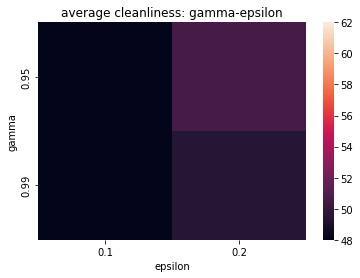

In [6]:
gropued = agg.groupby(['gamma','epsilon'])
avg_cln = gropued['cleaned'].mean().unstack()
sns.heatmap(avg_cln, vmin=48, vmax=62)
plt.title("average cleanliness: gamma-epsilon")
plt.savefig('average-cleanliness-gamma-epsilon.png')
plt.show()

In [7]:
import copy
d = copy.deepcopy(agg)
d = d[d['gamma']==0.95]
d = d[d['epsilon']==0.2]
d.sort_values(by='cleaned')

,gamma,epsilon,c1,c2,k_epoch,actor_lr,critic_lr,steps,cleaned
126,0.95,0.2,0.5,0.10,40.0,0.0010,0.010,15.0,33.504274
117,0.95,0.2,0.5,0.10,20.0,0.0010,0.001,25.0,37.264957
119,0.95,0.2,0.5,0.10,20.0,0.0010,0.010,25.0,37.435897
124,0.95,0.2,0.5,0.10,40.0,0.0010,0.001,15.0,37.777778
120,0.95,0.2,0.5,0.10,40.0,0.0003,0.001,15.0,38.974359
...,...,...,...,...,...,...,...,...,...
78,0.95,0.2,0.1,0.01,40.0,0.0010,0.010,15.0,58.632479
65,0.95,0.2,0.1,0.01,20.0,0.0003,0.001,25.0,58.632479
111,0.95,0.2,0.5,0.01,40.0,0.0010,0.010,25.0,59.145299
110,0.95,0.2,0.5,0.01,40.0,0.0010,0.010,15.0,60.000000


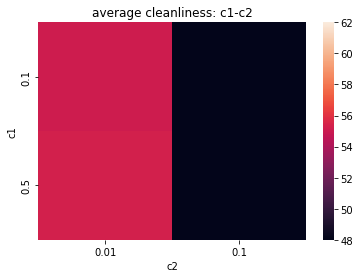

In [8]:
gropued = d.groupby(['c1','c2'])
avg_cln = gropued['cleaned'].mean().unstack()
sns.heatmap(avg_cln, vmin=48, vmax=62)
plt.title("average cleanliness: c1-c2")
plt.savefig('average-cleanliness-c1-c2.png')
plt.show()

In [9]:
d = d[d['c1']==0.5]
d = d[d['c2']==0.01]
d.sort_values(by='cleaned')

,gamma,epsilon,c1,c2,k_epoch,actor_lr,critic_lr,steps,cleaned
103,0.95,0.2,0.5,0.01,20.0,0.0010,0.010,25.0,48.205128
104,0.95,0.2,0.5,0.01,40.0,0.0003,0.001,15.0,50.940171
100,0.95,0.2,0.5,0.01,20.0,0.0010,0.001,15.0,51.965812
98,0.95,0.2,0.5,0.01,20.0,0.0003,0.010,15.0,52.136752
101,0.95,0.2,0.5,0.01,20.0,0.0010,0.001,25.0,53.162393
96,0.95,0.2,0.5,0.01,20.0,0.0003,0.001,15.0,53.504274
109,0.95,0.2,0.5,0.01,40.0,0.0010,0.001,25.0,53.675214
99,0.95,0.2,0.5,0.01,20.0,0.0003,0.010,25.0,54.700855
97,0.95,0.2,0.5,0.01,20.0,0.0003,0.001,25.0,55.897436
105,0.95,0.2,0.5,0.01,40.0,0.0003,0.001,25.0,56.068376


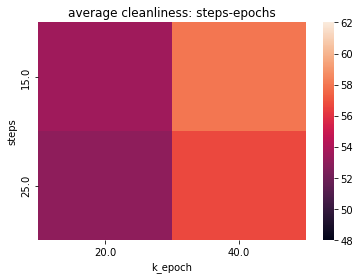

In [10]:
gropued = d.groupby(['steps','k_epoch'])
avg_cln = gropued['cleaned'].mean().unstack()
sns.heatmap(avg_cln, vmin=48, vmax=62)
plt.title("average cleanliness: steps-epochs")
plt.savefig('average-cleanliness-steps-epochs.png')
plt.show()

In [11]:
d = d[d['steps']==15]
d = d[d['k_epoch']==40]
d.sort_values(by='cleaned')

,gamma,epsilon,c1,c2,k_epoch,actor_lr,critic_lr,steps,cleaned
104,0.95,0.2,0.5,0.01,40.0,0.0003,0.001,15.0,50.940171
106,0.95,0.2,0.5,0.01,40.0,0.0003,0.010,15.0,57.606838
110,0.95,0.2,0.5,0.01,40.0,0.0010,0.010,15.0,60.000000
108,0.95,0.2,0.5,0.01,40.0,0.0010,0.001,15.0,63.418803


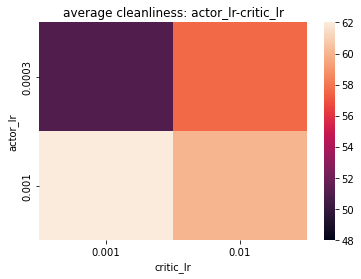

In [12]:
gropued = d.groupby(['actor_lr','critic_lr'])
avg_cln = gropued['cleaned'].mean().unstack()
sns.heatmap(avg_cln, vmin=48, vmax=62)
plt.title("average cleanliness: actor_lr-critic_lr")
plt.savefig('average-cleanliness-actor_lr-critic_lr.png')
plt.show()

In [13]:
d = d[d['actor_lr']==0.001]
d = d[d['critic_lr']==0.001]
d.sort_values(by='cleaned')

,gamma,epsilon,c1,c2,k_epoch,actor_lr,critic_lr,steps,cleaned
108,0.95,0.2,0.5,0.01,40.0,0.001,0.001,15.0,63.418803
